In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import liana as li
import scanpy as sc
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
# prepare the scanpy object corresponding to the seurat object
counts = pd.read_csv("seurat_counts.csv", index_col=0)
counts = counts.transpose()
adata = sc.AnnData(counts)
metadata = pd.read_csv("seurat_metadata.csv", index_col=0)
adata.obs = metadata.loc[adata.obs_names]
adata.raw = adata.copy()

In [3]:
colors = pd.read_csv("humouse.csv") # colors from my cellchat analysis
ourDB = pd.read_csv("CellChatDB.csv", index_col=0) # our curated database with cellphone, celltalk, cellchat

## Run the LIANA consensus method with their database or our database

In [4]:
# run the multimethod consensus LIANA method with the LIANA DB
li.mt.rank_aggregate(adata,
                     groupby='celltype',
                     resource_name='mouseconsensus',
                     expr_prop=0.05,
                     verbose=True)

lrresults = adata.uns['liana_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.2 #################
lrresults = lrresults.loc[lrresults['specificity_rank'] < THR,:]
lrresults = lrresults.loc[lrresults['magnitude_rank'] < 1,:] # remove those ranked by all methods as negligible magnitude
liana_results_lianaDB = lrresults.copy()
cols = liana_results_lianaDB.columns.values
cols[cols == "ligand_complex"] = "ligand"
cols[cols == "receptor_complex"] = "receptor"
liana_results_lianaDB.columns = cols

# run the multimethod consensus LIANA method with our DB
li.mt.rank_aggregate(adata,
                     groupby='celltype',
                     resource=ourDB[["ligand","receptor"]],
                     expr_prop=0.05, ##### we have few cells
                     verbose=True)

lrresults = adata.uns['liana_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.2 #################
lrresults = lrresults.loc[lrresults['specificity_rank'] < THR,:]
lrresults = lrresults.loc[lrresults['magnitude_rank'] < 1,:] 
liana_results_ourDB = lrresults.copy()
cols = liana_results_ourDB.columns.values
cols[cols == "ligand_complex"] = "ligand"
cols[cols == "receptor_complex"] = "receptor"
liana_results_ourDB.columns = cols

Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.24 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1137 features
Assuming that counts were `natural` log-normalized!


/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:360: RuntimeWarning: overflow encountered in power


Running CellPhoneDB


100%|██████████| 1000/1000 [00:04<00:00, 207.09it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.37 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1000 features
Assuming that counts were `natural` log-normalized!


/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:262: ImplicitModificationWarning: Setting element `.layers['scaled']` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/sc/_liana_pipe.py:360: RuntimeWarning: overflow encountered in power


Running CellPhoneDB


100%|██████████| 1000/1000 [00:04<00:00, 225.83it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


## Run CellChat-py through LIANA, with their database or our database

In [5]:
cellchat(adata,
            groupby='celltype',
            resource_name='mouseconsensus', ##############################
            expr_prop=0.1,
            verbose=True, key_added='cellchat_res')
lrresults = adata.uns['cellchat_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellchat_pvals'] < THR,:]
cellchat_results_lianaDB = lrresults.copy()

cellchat(adata,
            groupby='celltype',
            resource=ourDB[["ligand","receptor"]], 
            expr_prop=0.1,
            verbose=True, key_added='cellchat_res_ourDB')
lrresults = adata.uns['cellchat_res_ourDB']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellchat_pvals'] < THR,:]
cellchat_results_ourDB = lrresults.copy()

Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.24 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1137 features


100%|██████████| 1000/1000 [00:33<00:00, 29.48it/s]
Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.37 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1000 features


100%|██████████| 1000/1000 [00:29<00:00, 34.13it/s]


## Run CellPhoneDB through LIANA, with their database or our database

In [6]:
cellphonedb(adata,
            groupby='celltype',
            resource_name='mouseconsensus', ##############################
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')
lrresults = adata.uns['cpdb_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellphone_pvals'] < THR,:]
lrresults = lrresults.loc[lrresults['lr_means'] > 0.2,:] # remove those with negligible magnitude (VERY EMPIRICAL)
cellphone_results_lianaDB = lrresults.copy()

cellphonedb(adata,
            groupby='celltype',
            resource=ourDB[["ligand","receptor"]], 
            expr_prop=0.1,
            verbose=True, key_added='cpdb_res')
lrresults = adata.uns['cpdb_res']
lrresults = lrresults.loc[(lrresults['source'].isin(colors['mouse'])) & (lrresults['target'].isin(colors['mouse'])),:]
THR = 0.05 ################# P-VALUE THRESHOLD
lrresults = lrresults.loc[lrresults['cellphone_pvals'] < THR,:]
lrresults = lrresults.loc[lrresults['lr_means'] > 0.2,:] # remove those with negligible magnitude (VERY EMPIRICAL)
cellphone_results_ourDB = lrresults.copy()

Using resource `mouseconsensus`.
Using `.raw`!
Converting to sparse csr matrix!
/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.24 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1137 features


100%|██████████| 1000/1000 [00:04<00:00, 205.63it/s]
Using `.raw`!
Converting to sparse csr matrix!


Using provided `resource`.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
3 features of mat are empty, they will be removed.
Make sure that normalized counts are passed!
Converting `celltype` to categorical!
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:271: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
/data/luca/emiliapaper2/liana-py/liana/method/_pipe_utils/_pre.py:153: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
0.37 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 1398 samples and 1000 features


100%|██████████| 1000/1000 [00:04<00:00, 207.17it/s]


## Read in our CellChat-R results

In [7]:
cellchatcomms = pd.read_csv("communication_filtered_all3databases2.txt", sep="\t")
cellchatcomms

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence,ligand_expressed,receptor_expressed
72,mDA0,mNbM,Wnt5a,Fzd2,0.001886,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1
75,mNbDA,mNbM,Wnt5a,Fzd2,0.003286,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1
78,mRgl1,mNbM,Wnt5a,Fzd2,0.002228,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1
80,mRgl3,mNbM,Wnt5a,Fzd2,0.010338,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1
81,mDA0,mNProg,Wnt5a,Fzd2,0.002064,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20807,mRgl1,mRgl3,Wnt7b,Sfrp1,0.010428,0.0,WNT7B_SFRP1,Wnt7b_Sfrp1,WNT7B,NaN,cellphonedb_PMID:12775774,1,1
20808,mRgl2,mRgl3,Wnt7b,Sfrp1,0.007428,0.0,WNT7B_SFRP1,Wnt7b_Sfrp1,WNT7B,NaN,cellphonedb_PMID:12775774,1,1
20813,mRgl1,mPeric,Wnt7b,Sfrp2,0.001726,0.0,WNT7B_SFRP2,Wnt7b_Sfrp2,WNT7B,NaN,cellphonedb_PMID:12775774,1,1
20814,mRgl2,mPeric,Wnt7b,Sfrp2,0.001227,0.0,WNT7B_SFRP2,Wnt7b_Sfrp2,WNT7B,NaN,cellphonedb_PMID:12775774,1,1


In [8]:
result_dfs = [cellchatcomms, liana_results_lianaDB, liana_results_ourDB, cellchat_results_lianaDB, cellchat_results_ourDB, cellphone_results_lianaDB, cellphone_results_ourDB]

In [9]:
remove = ["App", "Hsp90aa1", "Calm1", "Rpsa", "Ncl", "Adam17"]

In [10]:
result_dfs = [res.loc[~res['ligand'].isin(remove) & ~res['receptor'].isin(remove), :] for res in result_dfs]
result_dfs

[      source  target  ligand receptor      prob  pval interaction_name  \
 72      mDA0    mNbM   Wnt5a     Fzd2  0.001886   0.0       WNT5A_FZD2   
 75     mNbDA    mNbM   Wnt5a     Fzd2  0.003286   0.0       WNT5A_FZD2   
 78     mRgl1    mNbM   Wnt5a     Fzd2  0.002228   0.0       WNT5A_FZD2   
 80     mRgl3    mNbM   Wnt5a     Fzd2  0.010338   0.0       WNT5A_FZD2   
 81      mDA0  mNProg   Wnt5a     Fzd2  0.002064   0.0       WNT5A_FZD2   
 ...      ...     ...     ...      ...       ...   ...              ...   
 20807  mRgl1   mRgl3   Wnt7b    Sfrp1  0.010428   0.0      WNT7B_SFRP1   
 20808  mRgl2   mRgl3   Wnt7b    Sfrp1  0.007428   0.0      WNT7B_SFRP1   
 20813  mRgl1  mPeric   Wnt7b    Sfrp2  0.001726   0.0      WNT7B_SFRP2   
 20814  mRgl2  mPeric   Wnt7b    Sfrp2  0.001227   0.0      WNT7B_SFRP2   
 20815   mDA2    mMgl  Cx3cl1   Cx3cr1  0.011992   0.0    Cx3cl1_Cx3cr1   
 
       interaction_name_2 pathway_name          annotation  \
 72         Wnt5a  - Fzd2        ncW

In [11]:
for res in result_dfs:
    res.index = res.source + "_" + res.target + "_" + res.ligand + "_" + res.receptor

In [12]:
callsets = [res.index.values for res in result_dfs]

/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


/data/luca/software/anaconda3/envs/liana_py/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

<Figure size 1000x600 with 0 Axes>

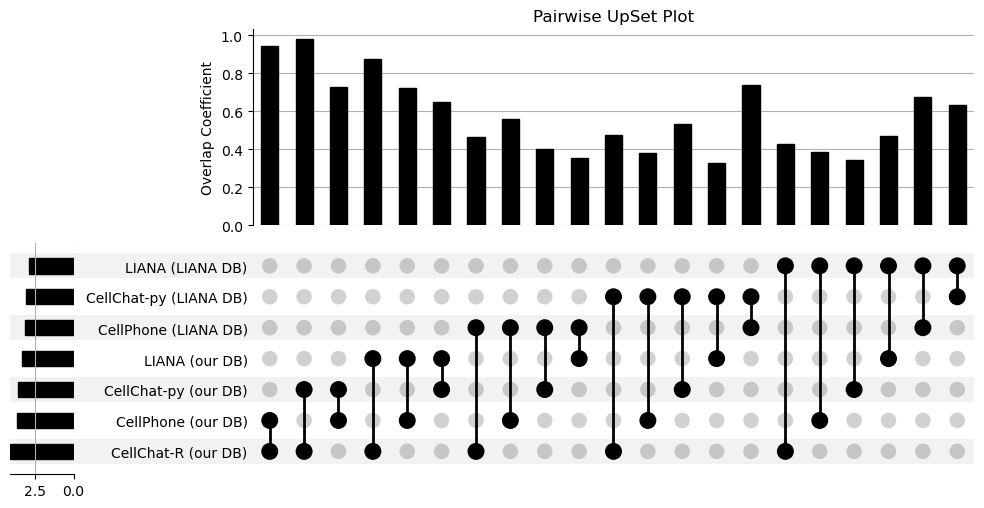

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from upsetplot import plot

names = [
    "CellChat-R (our DB)",
    "LIANA (LIANA DB)",
    "LIANA (our DB)",
    "CellChat-py (LIANA DB)",
    "CellChat-py (our DB)",
    "CellPhone (LIANA DB)",
    "CellPhone (our DB)"
]

contents = {name: set(cs) for name, cs in zip(names, callsets)}
n = len(names)
pairwise_values = {}
for comb in itertools.product([False, True], repeat=n):
    if sum(comb) != 2:
        continue
        
    selected_indices = [i for i, flag in enumerate(comb) if flag]
    selected_names = [names[i] for i in selected_indices]

    inter = set.intersection(*(contents[name] for name in selected_names))

    set_sizes = [len(contents[name]) for name in selected_names]
    denom = min(set_sizes) if set_sizes else 0
    
    norm_val = len(inter) / denom if denom > 0 else 0
    pairwise_values[comb] = norm_val

pairwise_series = pd.Series(pairwise_values)

pairwise_series.index = pairwise_series.index.set_names(names)

plt.figure(figsize=(10, 6))
plot(pairwise_series)
plt.title("Pairwise UpSet Plot")
plt.ylabel("Overlap Coefficient")
plt.savefig("upset.pdf")
plt.show()

## Conservation of source and target rankings

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 51 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'bar', 'c', 'comma', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'v', 'w', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 44, 47, 49, 51, 53, 54, 55, 56, 68, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 95]
Closed glyph list over 'MATH': 57 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'N', 'P', 'R', 'S', 'T', 'U', 'a', 'bar', 'c', 'comma', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'hyphen', '

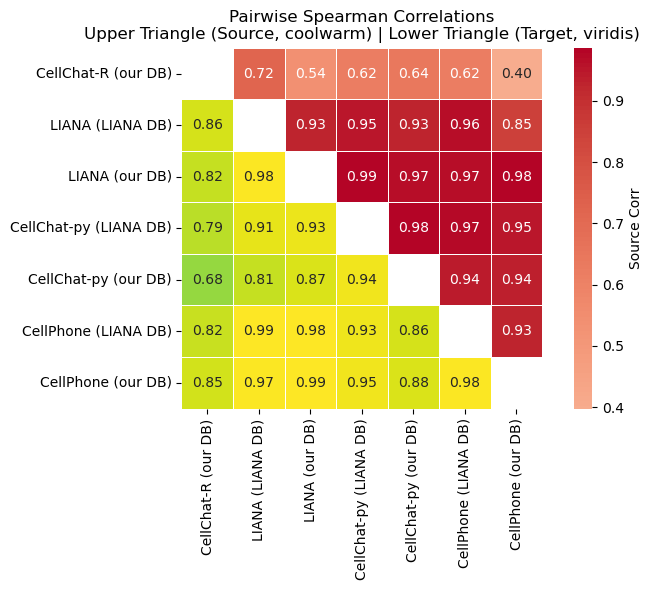

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

n = len(result_dfs)
corr_matrix = np.empty((n, n))
corr_matrix[:] = np.nan  

for i in range(n):
    for j in range(n):
        if i == j:
            corr_matrix[i, j] = np.nan
        elif i < j:
            vc1 = result_dfs[i]['source'].value_counts()
            vc2 = result_dfs[j]['source'].value_counts().loc[vc1.index]
            rho, _ = spearmanr(vc1, vc2)
            corr_matrix[i, j] = rho
        else:
            vc1 = result_dfs[i]['target'].value_counts()
            vc2 = result_dfs[j]['target'].value_counts().loc[vc1.index]
            rho, _ = spearmanr(vc1, vc2)
            corr_matrix[i, j] = rho

labels = names
corr_df = pd.DataFrame(corr_matrix, index=labels, columns=labels)

mask_upper = np.triu(np.ones_like(corr_df, dtype=bool), k=1)
mask_lower = np.tril(np.ones_like(corr_df, dtype=bool), k=-1)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df, mask=mask_lower, annot=True, fmt=".2f", cmap="coolwarm",
            center=0, square=True, linewidths=0.5, cbar=True,
            cbar_kws={"label": "Source Corr"}, ax=ax)
sns.heatmap(corr_df, mask=mask_upper, annot=True, fmt=".2f", cmap="viridis",
            center=0, square=True, linewidths=0.5, cbar=False, ax=ax)
ax.set_title("Pairwise Spearman Correlations\n"
             "Upper Triangle (Source, coolwarm) | Lower Triangle (Target, viridis)")
plt.tight_layout()
plt.savefig("ranks_are_conserved.pdf")
plt.show()

## Compare the two databases

In [15]:
lianaDB = li.resource.select_resource("mouseconsensus")
s1 = (ourDB['ligand']+"_"+ourDB['receptor']).values
s2 = (lianaDB['ligand']+"_"+lianaDB['receptor']).values
s2

array(['Dll1_Notch1', 'Dll1_Notch2', 'Dll1_Notch4', ..., 'Serpina1c_Lrp1',
       'Serpina1d_Lrp1', 'Serpina1e_Lrp1'], dtype=object)

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 20 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'six', 'space', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 24, 25, 27, 28, 36, 37, 39, 44, 47, 49, 82, 85, 88]
Closed glyph list over 'MATH': 20 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'six', 'space', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21, 22, 24, 25, 27, 28, 36, 37, 39, 44, 47, 49, 82, 85, 88]
Closing glyph list over 'GSUB': 20 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'D', 'I', 'L', 'N', 'eight', 'five', 'nine', 'nonmarkingreturn', 'o', 'one', 'r', 'six', 'space', 'three', 'two', 'u']
Glyph IDs:   [0, 1, 2, 3, 20, 21,

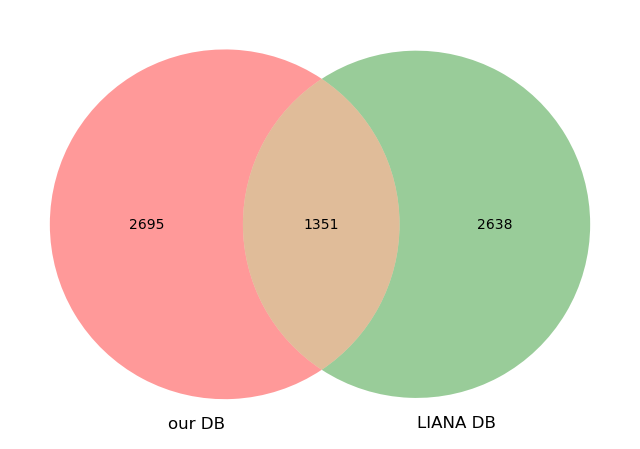

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

set1 = set(s1)
set2 = set(s2)
plt.figure(figsize=(8, 6))
venn_diagram = venn2([set1, set2], set_labels=("our DB", "LIANA DB"))

plt.savefig("venn.pdf")
plt.show()


## LIANA engine + our DB does not lose any interaction that we reported

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned


Spearman correlation: 0.569, p-value: 0.000


glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 49 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'L', 'M', 'N', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'quotesingle', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 32, 36, 38, 39, 44, 47, 48, 49, 53, 54, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 55 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'C', 'D', 'I', 'L', 'M', 'N', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 

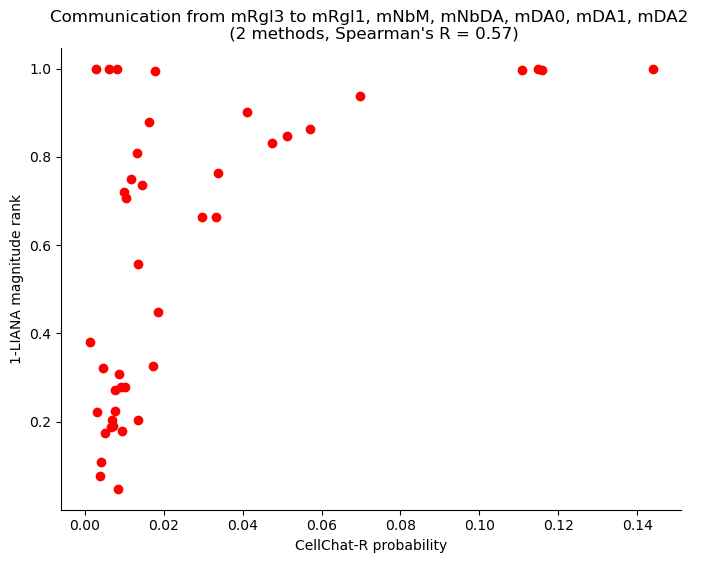

In [17]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "mRgl3") & (cellchatcomms['target'].isin(["mRgl1", "mNbM", "mNbDA", "mDA0", "mDA1", "mDA2"])),
    :
]
lianargl3 = result_dfs[2].loc[result_dfs[2].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = 1 - lianargl3_extended['magnitude_rank']
y = y.groupby(y.index).mean()

rho, p_value = spearmanr(x, y)
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, c="red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability")
ax.set_ylabel("1-LIANA magnitude rank")
plt.title(f"Communication from mRgl3 to mRgl1, mNbM, mNbDA, mDA0, mDA1, mDA2 \n (2 methods, Spearman's R = {rho:.2f})")
plt.savefig("liana_onourDB_rediscoversall.pdf")
plt.show()

In [18]:
sum(y == 1) / len(y)

0.07142857142857142

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 48 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'quotesingle', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 32, 36, 37, 38, 39, 47, 48, 49, 51, 53, 54, 68, 69, 70, 71, 72, 73, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 54 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'L', 'M', 'N', 'P', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'four', 'g', 'h', 'hyphen', 'i', 'l', 'm', 'n', 'nonmark

Spearman correlation: 0.871, p-value: 0.000


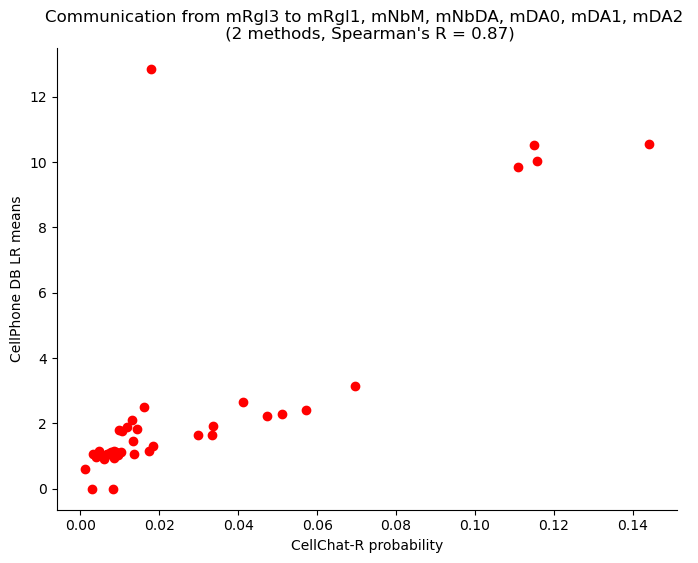

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "mRgl3") & (cellchatcomms['target'].isin(["mRgl1", "mNbM", "mNbDA", "mDA0", "mDA1", "mDA2"])),
    :
]
lianargl3 = result_dfs[6].loc[result_dfs[6].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = lianargl3_extended['lr_means']
y = y.groupby(y.index).mean()

rho, p_value = spearmanr(x, y)
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x, y, c="red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability")
ax.set_ylabel("CellPhone DB LR means")
plt.title(f"Communication from mRgl3 to mRgl1, mNbM, mNbDA, mDA0, mDA1, mDA2 \n (2 methods, Spearman's R = {rho:.2f})")
plt.savefig("cellphone_onourDB_rediscoversall.pdf")
plt.show()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 51 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'M', 'N', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'quotesingle', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 32, 36, 37, 38, 39, 44, 47, 48, 49, 53, 54, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 92]
Closed glyph list over 'MATH': 57 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'I', 'L', 'M', 'N', 'R', 'S', 'a', 'b', 'c', 'comma', 'd', 'e', 'eight', 'equal', 'f', 'five', 'four', 'g', 'h

Spearman correlation: 0.937, p-value: 0.000


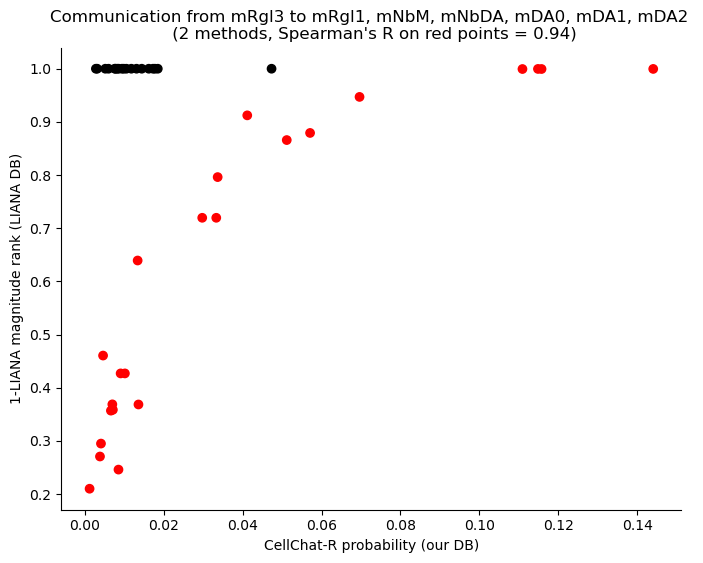

In [20]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

cellchatcomms = result_dfs[0]
ccrgl3 = cellchatcomms.loc[
    (cellchatcomms['source'] == "mRgl3") & (cellchatcomms['target'].isin(["mRgl1", "mNbM", "mNbDA", "mDA0", "mDA1", "mDA2"])),
    :
]
lianargl3 = result_dfs[1].loc[result_dfs[1].index.isin(ccrgl3.index), :]
lianargl3_extended = lianargl3.reindex(ccrgl3.index, fill_value=0)
lianargl3_extended = lianargl3_extended.loc[ccrgl3.index, :]

x = ccrgl3["prob"]
x = x.groupby(x.index).mean()  # average per index
y = 1-lianargl3_extended['magnitude_rank']
y = y.groupby(y.index).mean()
mask = np.array([True if val < 1 else False for val in y])

rho, p_value = spearmanr(x[mask], y[mask])
print(f"Spearman correlation: {rho:.3f}, p-value: {p_value:.3f}")

fig, ax = plt.subplots(figsize=(8, 6))
colors = np.where(mask, "red", "black")
ax.scatter(x, y, c=colors)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("CellChat-R probability (our DB)")
ax.set_ylabel("1-LIANA magnitude rank (LIANA DB)")
plt.title(f"Communication from mRgl3 to mRgl1, mNbM, mNbDA, mDA0, mDA1, mDA2 \n (2 methods, Spearman's R on red points = {rho:.2f})")
plt.savefig("lianaliana_vs_ourresults.pdf")
plt.show()

## Quick briefing on what we might be missing but LIANA claims

In [21]:
lianaliana = result_dfs[1].copy()
#lianaliana = lianaliana.loc[~lianaliana.index.isin(result_dfs[0].index),:]
lianaliana = lianaliana.loc[
    (lianaliana['source'] == "mRgl3") & (lianaliana['target'].isin(["mRgl1", "mNbM", "mNbDA", "mDA0", "mDA1", "mDA2"])),
    :
]
lianaliana = lianaliana.loc[lianaliana["specificity_rank"] < 0.1,:] # be specific 
lianaliana = lianaliana.sort_values(by="magnitude_rank")
lianaliana['target-receptor'] = lianaliana['target'] + " - " + lianaliana['receptor']
lianaliana['target-receptor']

mRgl3_mNbM_Ntn1_Dcc                         mNbM - Dcc
mRgl3_mDA1_Ntn1_Dcc                         mDA1 - Dcc
mRgl3_mDA2_Ntn1_Dcc                         mDA2 - Dcc
mRgl3_mNbDA_Ntn1_Dcc                       mNbDA - Dcc
mRgl3_mDA0_Ntn1_Dcc                         mDA0 - Dcc
                                          ...         
mRgl3_mDA1_Slit1_Gpc1                      mDA1 - Gpc1
mRgl3_mRgl1_Jam2_Itgav_Itgb1       mRgl1 - Itgav_Itgb1
mRgl3_mDA1_S100a1_Ryr1                     mDA1 - Ryr1
mRgl3_mDA1_S100a1_Trpm3                   mDA1 - Trpm3
mRgl3_mDA0_Col22a1_Itga10_Itgb1    mDA0 - Itga10_Itgb1
Name: target-receptor, Length: 452, dtype: object

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lianaliana['overlap'] = 1 - lianaliana['magnitude_rank'] 
lianaliana[['target', 'receptor']] = lianaliana['target-receptor'].str.split('-', expand=True)
lianaliana.set_index(['target', 'receptor'], inplace=True)
lianaliana = lianaliana.groupby(['target', 'receptor', 'ligand'])['overlap'].mean().unstack()

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 59 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'P', 'R', 'S', 'T', 'V', 'W', 'a', 'b', 'c', 'd', 'e', 'eight', 'f', 'five', 'four', 'g', 'h', 'hyphen', 'i', 'k', 'l', 'm', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'parenleft', 'parenright', 'period', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'x', 'y', 'zero']
Glyph IDs:   [0, 1, 2, 3, 11, 12, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 51, 53, 54, 55, 57, 58, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 85, 86, 87, 88, 91, 92]
Closed glyph list over 'MATH': 65 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'P

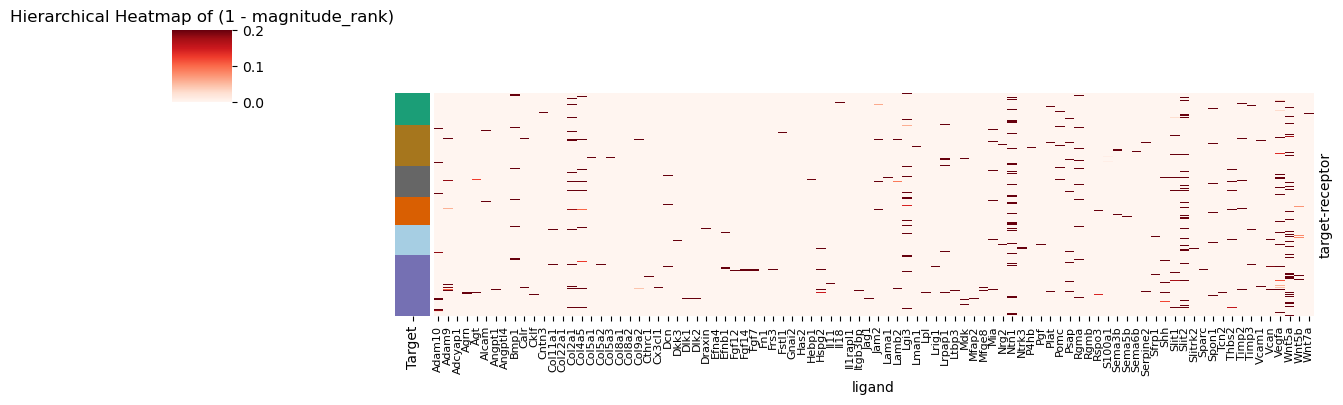

In [24]:
targets = lianaliana.index.get_level_values(0).unique()

colors = pd.read_csv("humouse.csv")
colors.index = colors.mouse
cols = colors.loc[['mDA0', 'mDA1', 'mDA2', 'mNbDA', 'mNbM', 'mRgl1'], "color"].values

target_colors = cols

target_color_dict = dict(zip(targets, target_colors))

row_colors = pd.DataFrame({
    'Target': [target_color_dict[t] for t in lianaliana.index.get_level_values(0)],
}, index=lianaliana.index)

g=sns.clustermap(
    lianaliana.fillna(0),
    cmap="Reds", vmax=0.2,
    linewidths=0,
    col_cluster=False, 
    row_cluster=False, 
    row_colors=row_colors,xticklabels=True,yticklabels=False,
    figsize=(12, 4)
)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xticklabels(), fontsize=8)
plt.title("Hierarchical Heatmap of (1 - magnitude_rank)")
plt.savefig("lianaliana_extracalls.pdf")
plt.show()

## If one did LIANA only, signaling hubs are the same

maxp pruned
cmap pruned
kern dropped
post pruned
FFTM dropped
GPOS pruned
GSUB pruned
glyf pruned
Added gid0 to subset
Added first four glyphs to subset
Closing glyph list over 'MATH': 38 glyphs before
Glyph names: ['.notdef', '.null', 'A', 'D', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'plus', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'zero']
Glyph IDs:   [0, 1, 2, 3, 14, 19, 20, 21, 22, 24, 26, 36, 39, 44, 47, 48, 49, 50, 51, 53, 54, 55, 68, 69, 70, 71, 72, 73, 74, 76, 79, 80, 81, 82, 85, 86, 87, 88]
Closed glyph list over 'MATH': 38 glyphs after
Glyph names: ['.notdef', '.null', 'A', 'D', 'I', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'a', 'b', 'c', 'd', 'e', 'f', 'five', 'g', 'i', 'l', 'm', 'n', 'nonmarkingreturn', 'o', 'one', 'plus', 'r', 's', 'seven', 'space', 't', 'three', 'two', 'u', 'zero']
Glyph IDs:   [0, 1, 2, 3, 14, 19, 20, 21, 22, 24, 26, 36, 39, 44, 47, 48, 49, 50,

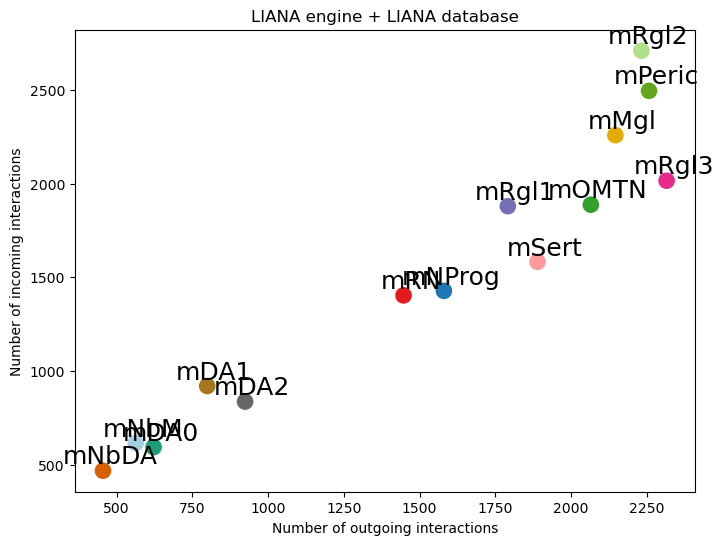

In [25]:
lrresults = liana_results_lianaDB.copy()

sourcescores = lrresults['source'].value_counts()
targetscores = lrresults['target'].value_counts()
targetscores = targetscores.loc[sourcescores.index]

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(sourcescores, targetscores, c=colors.loc[sourcescores.index, 'color'], s=120)

for label, x, y in zip(sourcescores.index, sourcescores, targetscores):
    plt.annotate(label, (x, y), textcoords="offset points", xytext=(5, 5), ha='center', fontsize=18)

plt.xlabel('Number of outgoing interactions')
plt.ylabel('Number of incoming interactions')
plt.title('LIANA engine + LIANA database')
plt.savefig("signalinghubsarepreserved.pdf")
plt.show()

## Export

In [26]:
for res, name in zip(result_dfs, names):
    cellchatcomms['confirmedin_' + name] = False
    cellchatcomms.loc[cellchatcomms.index.isin(res.index), 'confirmedin_' + name] = True

/tmp/ipykernel_107670/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_107670/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_107670/1850867030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/tmp/ipykernel_1076

In [27]:
cellchatcomms_rgl3 = cellchatcomms.loc[cellchatcomms['source'] == "mRgl3",:]
cellchatcomms_rgl3.to_csv("cellchatcomms_rgl3_comparison.csv")
cellchatcomms_rgl3

,source,target,ligand,receptor,prob,pval,interaction_name,interaction_name_2,pathway_name,annotation,evidence,ligand_expressed,receptor_expressed,confirmedin_CellChat-R (our DB),confirmedin_LIANA (LIANA DB),confirmedin_LIANA (our DB),confirmedin_CellChat-py (LIANA DB),confirmedin_CellChat-py (our DB),confirmedin_CellPhone (LIANA DB),confirmedin_CellPhone (our DB)
mRgl3_mNbM_Wnt5a_Fzd2,mRgl3,mNbM,Wnt5a,Fzd2,0.010338,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1,True,True,True,True,True,True,True
mRgl3_mNProg_Wnt5a_Fzd2,mRgl3,mNProg,Wnt5a,Fzd2,0.011305,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1,True,True,True,True,True,True,True
mRgl3_mRgl1_Wnt5a_Fzd2,mRgl3,mRgl1,Wnt5a,Fzd2,0.033916,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1,True,True,True,True,True,True,True
mRgl3_mRgl2_Wnt5a_Fzd2,mRgl3,mRgl2,Wnt5a,Fzd2,0.032214,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1,True,True,True,True,True,True,True
mRgl3_mRgl3_Wnt5a_Fzd2,mRgl3,mRgl3,Wnt5a,Fzd2,0.026880,0.0,WNT5A_FZD2,Wnt5a - Fzd2,ncWNT,Secreted Signaling,KEGG: mmu04310,1,1,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mRgl3_mRgl2_Wnt5a_Notch1,mRgl3,mRgl2,Wnt5a,Notch1,0.036325,0.0,WNT5A_NOTCH1,Wnt5a_Notch1,WNT5A,NaN,celltalkdb_30347193,1,1,True,False,True,False,True,False,True
mRgl3_mRgl3_Wnt5a_Notch1,mRgl3,mRgl3,Wnt5a,Notch1,0.013976,0.0,WNT5A_NOTCH1,Wnt5a_Notch1,WNT5A,NaN,celltalkdb_30347193,1,1,True,False,True,False,True,False,True
mRgl3_mRgl2_Wnt5a_Sfrp1,mRgl3,mRgl2,Wnt5a,Sfrp1,0.034922,0.0,WNT5A_SFRP1,Wnt5a_Sfrp1,WNT5A,NaN,cellphonedb_PMID:12775774,1,1,True,False,True,False,True,False,True
mRgl3_mRgl3_Wnt5a_Sfrp1,mRgl3,mRgl3,Wnt5a,Sfrp1,0.047735,0.0,WNT5A_SFRP1,Wnt5a_Sfrp1,WNT5A,NaN,cellphonedb_PMID:12775774,1,1,True,False,True,False,True,False,True


In [28]:
liana_results_lianaDB.to_csv("liana_on_liana_ALL.csv")